In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
import matplotlib.pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
from scipy import stats
import seaborn as sns

In [2]:
from dishpylib.pyanalysis import tee_plot

# get data

In [3]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/stage=8+what=elaborated/',
)

In [4]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format( hash_pandas_object( df ).sum() )
dfdigest

'581a93929506b064'

In [5]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# how does expression differentiation complexity change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=number-unique-module-expression-profiles+_dfdigest=581a93929506b064+ext=.pdf


<AxesSubplot:xlabel='Stint', ylabel='Number Unique Module Expression Profiles'>

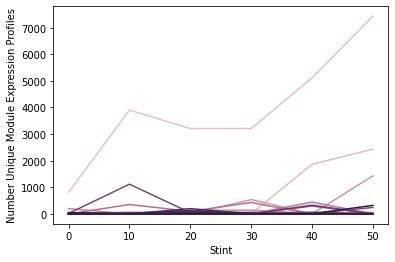

In [6]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Number Unique Module Expression Profiles',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.8% of the points cannot be placed; y

outplots/bucket=prq49+endeavor=16+transform=identity+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-expression-profiles+_dfdigest=581a93929506b064+ext=.pdf


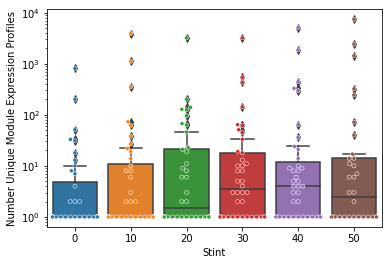

In [7]:
def semilog_swarmplot_boxplot(*args, **kwargs):
    plt.semilogy()
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    semilog_swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Number Unique Module Expression Profiles',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how does regulation differentiation complexity change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=number-unique-module-regulation-profiles+_dfdigest=581a93929506b064+ext=.pdf


<AxesSubplot:xlabel='Stint', ylabel='Number Unique Module Regulation Profiles'>

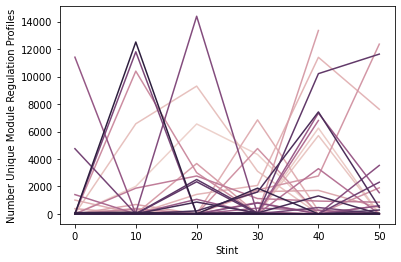

In [8]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Number Unique Module Regulation Profiles',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 32.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; y

outplots/bucket=prq49+endeavor=16+transform=identity+viz=semilog-swarmplot-boxplot+x=stint+y=number-unique-module-regulation-profiles+_dfdigest=581a93929506b064+ext=.pdf


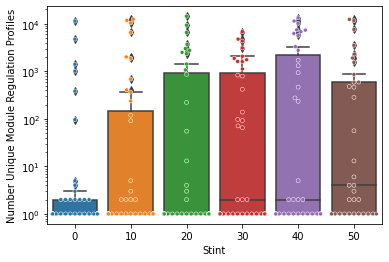

In [9]:
def semilog_swarmplot_boxplot(*args, **kwargs):
    plt.semilogy()
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    semilog_swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Number Unique Module Regulation Profiles',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)

# how instruction execution intensity change over time?

outplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+_dfdigest=581a93929506b064+ext=.pdf


<AxesSubplot:xlabel='Stint', ylabel='Num Instructions Executed per Live Cardinal-update'>

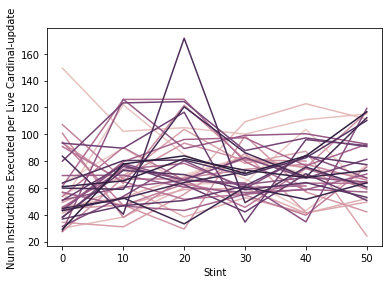

In [10]:
tee_plot(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Num Instructions Executed per Live Cardinal-update',
    hue='Series',
    legend=False,
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',    
        '_dfdigest' : dfdigest,
    },
)

outplots/bucket=prq49+endeavor=16+transform=identity+viz=swarmplot-boxplot+x=stint+y=num-instructions-executed-per-live-cardinal-update+_dfdigest=581a93929506b064+ext=.pdf


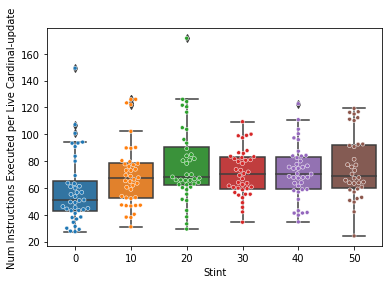

In [11]:
def swarmplot_boxplot(*args, **kwargs):
    sns.swarmplot(
        *args,
        **kwargs,
        edgecolor='w',
        linewidth=0.5,
        s=4,
    )
    sns.boxplot(
        *args,
        **kwargs,
    )

tee_plot(
    swarmplot_boxplot,
    data=df,
    x='Stint',
    y='Num Instructions Executed per Live Cardinal-update',
    outattrs={
        'bucket' : ib.dub( df['Treatment bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'] ),
        'transform' : 'identity',
        '_dfdigest' : dfdigest,
    },
)